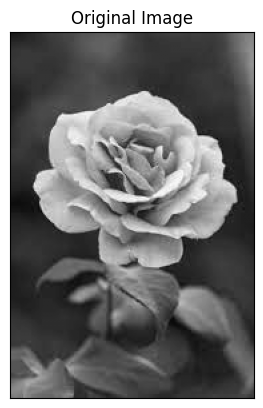

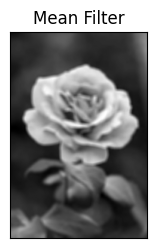

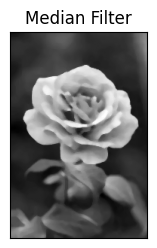

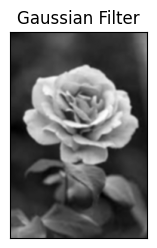

In [8]:
import cv2
import matplotlib.pyplot as plt
# Read the image
img = cv2.imread("C:/Users/Prakrithi/Documents/download (2).jpg", cv2.IMREAD_GRAYSCALE)
# Apply filters
mean_filtered = cv2.blur(img, (5, 5))
median_filtered = cv2.medianBlur(img, 5)
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 0)
# Plot results
titles = ['Original Image', 'Mean Filter', 'Median Filter', 'Gaussian Filter']
images = [img, mean_filtered, median_filtered, gaussian_filtered]
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()
    plt.show()

In [5]:
pip install opencv

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


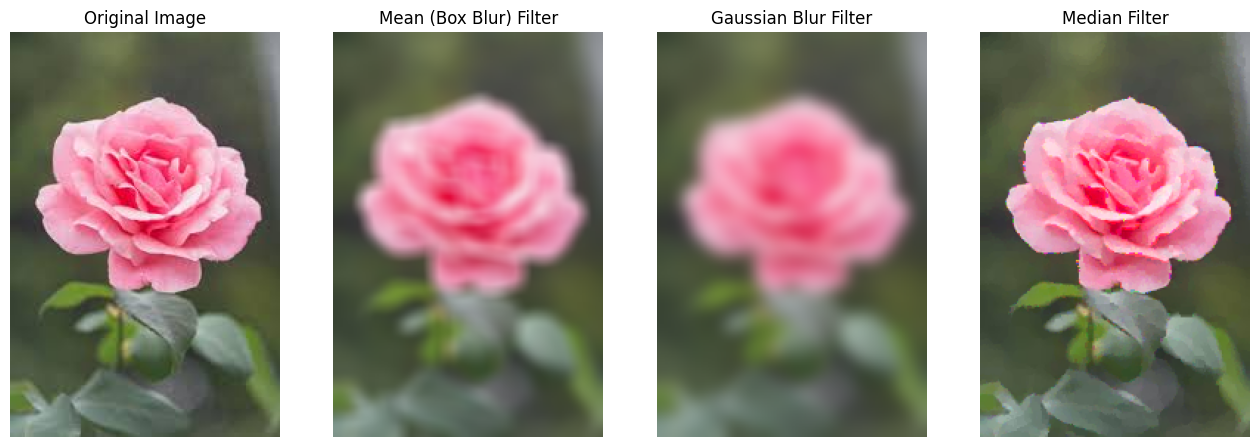

In [9]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

# Load the image (Replace 'image.jpg' with your actual file path)
image = Image.open("C:/Users/Prakrithi/Documents/download (2).jpg").convert("RGB")

# Apply Mean (Box Blur) Filter
mean_blur = image.filter(ImageFilter.BoxBlur(5))

# Apply Gaussian Blur Filter
gaussian_blur = image.filter(ImageFilter.GaussianBlur(5))

# Apply Median Filter (Using ModeFilter as an approximation in PIL)
median_blur = image.filter(ImageFilter.ModeFilter(size=5))

# Display the results
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
axes[0].imshow(image); axes[0].set_title("Original Image"); axes[0].axis("off")
axes[1].imshow(mean_blur); axes[1].set_title("Mean (Box Blur) Filter"); axes[1].axis("off")
axes[2].imshow(gaussian_blur); axes[2].set_title("Gaussian Blur Filter"); axes[2].axis("off")
axes[3].imshow(median_blur); axes[3].set_title("Median Filter"); axes[3].axis("off")

plt.show()


In [3]:
from tkinter import Tk, Button, Label, filedialog
from PIL import Image, ImageTk, ImageFilter
import matplotlib.pyplot as plt

# Global variable for storing the original image
original_image = None

# Function to load image
def load_image():
    global original_image
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp")])
    if file_path:
        original_image = Image.open(file_path).convert("RGB")
        show_filters()

# Function to apply filters and display results
def show_filters():
    if original_image is None:
        return
    
    # Apply filters
    mean_blur = original_image.filter(ImageFilter.BoxBlur(5))
    gaussian_blur = original_image.filter(ImageFilter.GaussianBlur(5))
    median_blur = original_image.filter(ImageFilter.ModeFilter(size=5))

    # Display results
    fig, axes = plt.subplots(1, 4, figsize=(16, 6))
    axes[0].imshow(original_image); axes[0].set_title("Original Image"); axes[0].axis("off")
    axes[1].imshow(mean_blur); axes[1].set_title("Mean (Box Blur) Filter"); axes[1].axis("off")
    axes[2].imshow(gaussian_blur); axes[2].set_title("Gaussian Blur Filter"); axes[2].axis("off")
    axes[3].imshow(median_blur); axes[3].set_title("Median Filter"); axes[3].axis("off")
    plt.tight_layout()
    plt.show()

# GUI Setup
root = Tk()
root.title("Image Filter Application")

label = Label(root, text="Click below to load an image and apply filters:")
label.pack(pady=10)

load_button = Button(root, text="Load Image", command=load_image)
load_button.pack(pady=5)

root.mainloop()


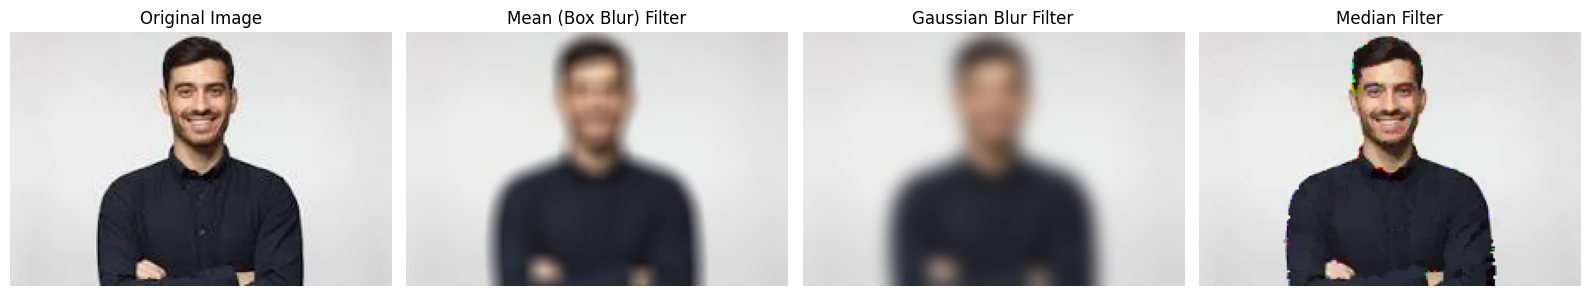

In [7]:
import tkinter as tk
from tkinter import ttk, filedialog
from PIL import Image, ImageTk, ImageFilter
import matplotlib.pyplot as plt

class ImageFilterApp:
    def __init__(self, root):
        self.root = root
        self.root.title("🖼️ Image Filter Application")
        self.root.geometry("600x500")
        self.root.configure(bg="#f0f0f0")

        self.original_image = None
        self.display_image = None

        # UI Elements
        self.title_label = ttk.Label(root, text="Image Filter Application", font=("Helvetica", 18))
        self.title_label.pack(pady=10)

        self.preview_label = ttk.Label(root)
        self.preview_label.pack(pady=10)

        self.button_frame = ttk.Frame(root)
        self.button_frame.pack(pady=10)

        self.load_button = ttk.Button(self.button_frame, text="📁 Load Image", command=self.load_image)
        self.load_button.grid(row=0, column=0, padx=10)

        self.mean_button = ttk.Button(self.button_frame, text="📦 Box Blur", command=self.apply_box_blur, state=tk.DISABLED)
        self.mean_button.grid(row=0, column=1, padx=10)

        self.gaussian_button = ttk.Button(self.button_frame, text="🌫 Gaussian Blur", command=self.apply_gaussian_blur, state=tk.DISABLED)
        self.gaussian_button.grid(row=0, column=2, padx=10)

        self.median_button = ttk.Button(self.button_frame, text="✨ Median Filter", command=self.apply_median_filter, state=tk.DISABLED)
        self.median_button.grid(row=0, column=3, padx=10)

        self.compare_button = ttk.Button(root, text="🔍 Compare All Filters", command=self.show_all_filters, state=tk.DISABLED)
        self.compare_button.pack(pady=15)

    def load_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp")])
        if file_path:
            self.original_image = Image.open(file_path).convert("RGB")
            self.display_thumbnail(self.original_image)
            self.enable_buttons()

    def enable_buttons(self):
        self.mean_button.config(state=tk.NORMAL)
        self.gaussian_button.config(state=tk.NORMAL)
        self.median_button.config(state=tk.NORMAL)
        self.compare_button.config(state=tk.NORMAL)

    def display_thumbnail(self, img):
        preview = img.copy()
        preview.thumbnail((300, 300))
        self.display_image = ImageTk.PhotoImage(preview)
        self.preview_label.config(image=self.display_image)

    def apply_filter_and_show(self, filtered_image, title):
        filtered_image.show(title=title)

    def apply_box_blur(self):
        if self.original_image:
            result = self.original_image.filter(ImageFilter.BoxBlur(5))
            self.apply_filter_and_show(result, "Box Blur")

    def apply_gaussian_blur(self):
        if self.original_image:
            result = self.original_image.filter(ImageFilter.GaussianBlur(5))
            self.apply_filter_and_show(result, "Gaussian Blur")

    def apply_median_filter(self):
        if self.original_image:
            result = self.original_image.filter(ImageFilter.ModeFilter(size=5))
            self.apply_filter_and_show(result, "Median Filter")

    def show_all_filters(self):
        if self.original_image:
            mean_blur = self.original_image.filter(ImageFilter.BoxBlur(5))
            gaussian_blur = self.original_image.filter(ImageFilter.GaussianBlur(5))
            median_blur = self.original_image.filter(ImageFilter.ModeFilter(size=5))

            fig, axes = plt.subplots(1, 4, figsize=(16, 6))
            axes[0].imshow(self.original_image); axes[0].set_title("Original Image"); axes[0].axis("off")
            axes[1].imshow(mean_blur); axes[1].set_title("Mean (Box Blur) Filter"); axes[1].axis("off")
            axes[2].imshow(gaussian_blur); axes[2].set_title("Gaussian Blur Filter"); axes[2].axis("off")
            axes[3].imshow(median_blur); axes[3].set_title("Median Filter"); axes[3].axis("off")
            plt.tight_layout()
            plt.show()

# Run the app
if __name__ == "__main__":
    root = tk.Tk()
    style = ttk.Style(root)
    style.theme_use("clam")  # More modern look
    app = ImageFilterApp(root)
    root.mainloop()
